## Capacitance Data Acquisition


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as ticker


# Set the path to the foldercontaining text files
folder_path = "C:\\Users\\w16025698\\OneDrive - Northumbria University - Production Azure AD\\PhD\\Characterisation\\CV\\230221A3_CV\\"

file_name = "230221A3_CV.txt"

# Read the data from the text file, skipping the first 12 lines
data = np.loadtxt(os.path.join(folder_path, file_name), skiprows=1)

# Extract the voltage and current data from the columns
voltage = data[:,0]
cap_data = data[:,1]

capacitance = 1/ np.sqrt(cap_data) # Capacitance in Farads

## Equations

$$
\frac{1}{C_{j}^{2}} = \frac{2}{A^2} \frac{V_0 - V_a}{q \epsilon N_d}
$$
***

$$
N_d(x) = \frac{2}{q \epsilon A^{2} \lvert \frac{d}{dV_a} \left( \frac{1}{C^{2}_{j}} \right) \rvert}
$$
***
$$
x= \frac{\epsilon A}{C_j}
$$

## Dopant Density and Depletion Width


In [3]:
q = 1.602176565E-10 # elementary charge nF.V
eps = 8.854187817E-05 # permitivity of vacuum nF/cm
eps_CZTS = 7.6 # Static dielectric constant for CZTS
A = 0.000016 # cell area in m2

inverse_cap_squared_nF = 1/(1E9 * capacitance)**2 # inverse capacitance squared in nano Farads

x_constants = eps*eps_CZTS*A*0.1 # constants in um 
x_um = x_constants/capacitance # depth in um

C_grad = np.gradient(inverse_cap_squared_nF, voltage) # gradient of inverse capacitance with respect to Vdelta

dopant_denisty_constants = 2/(q*eps*eps_CZTS*(A*1E4)**2)
dopant_density = dopant_denisty_constants/abs(C_grad)

# Find index of voltage closest to 0
voltage_zero_idx = np.argmin(np.abs(voltage))

# Calculate dopant density and x_um at voltage=0
inverse_cap_squared_zero = inverse_cap_squared_nF[voltage_zero_idx]
capacitance_zero = capacitance[voltage_zero_idx]
C_grad_zero = C_grad[voltage_zero_idx]

x_um_zero = x_constants/capacitance_zero
dopant_density_zero = 2/(q*eps*eps_CZTS*(A*1E4)**2*abs(C_grad_zero))

print("Dopant density at voltage = 0: {:.2e} cm^-3".format(dopant_density_zero))
print("Depth (x_um) at voltage = 0: {:.2f} um".format(x_um_zero))

Dopant density at voltage = 0: 6.27e+16 cm^-3
Depth (x_um) at voltage = 0: 0.07 um


## Built-in Voltage

Built-in Voltage (V0): 0.2971


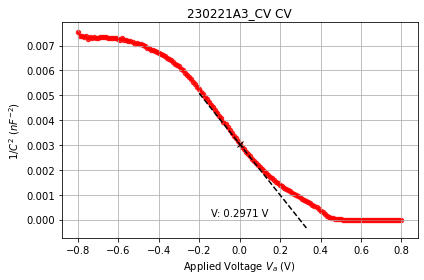

In [4]:
### Plot inverse capactiance squared in nF vs applied voltage
fig2, ax = plt.subplots()

ax.set_xlabel("Applied Voltage $V_a$ (V)")
ax.set_ylabel("$1/C^2$ ($nF^{-2}$)")
ax.plot(voltage, inverse_cap_squared_nF, color='r')
ax.scatter(voltage, inverse_cap_squared_nF, c='r', alpha=0.8, marker='o', s=20)
ax.grid()

### Calculate V0 ###
v1 = -0.2 # lower bound
v2 = 0.2 # upper bound
# Find inflection point
C_grad2 = np.gradient(C_grad, voltage) # second order derivative of inverse cap sqaured
v_range_indices = np.where((voltage >= v1) & (voltage <= v2))
inflection_index = v_range_indices[0][np.argmax(C_grad2[v_range_indices])]

#print(inflection_index)
#print(voltage[inflection_index])
plt.plot(voltage[inflection_index], inverse_cap_squared_nF[inflection_index],  'kx')

# Plot the tangent line
x1 = voltage[inflection_index] - 0.2
x2 = voltage[inflection_index] + 0.33
x_vals = np.linspace(x1, x2, num=100)
y_vals = C_grad[inflection_index] * x_vals + inverse_cap_squared_nF[inflection_index]
ax.plot(x_vals, y_vals, 'k--')
#ax.axhline(0,color='k')

V0 = - inverse_cap_squared_nF[inflection_index] / C_grad[inflection_index]
print("Built-in Voltage (V0): {:.4f}".format(V0))
Vdelta = V0 - voltage # V0 - applied voltage

# Add V0 as text onto the figure
ax.text(0.5, 0.1, "V: {:.4f} V".format(V0), 
        transform=ax.transAxes, fontsize=10, ha='center')

#CV_title = ''
CV_title = file_name.replace('.txt', ' CV')
plt.title(CV_title)
plt.tight_layout()

# Figure save settings
save_dir = os.path.join(folder_path, 'CV plots')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
plt.savefig(os.path.join(save_dir, CV_title + '.png'), dpi=300)

# Capacitance-Voltage Plots

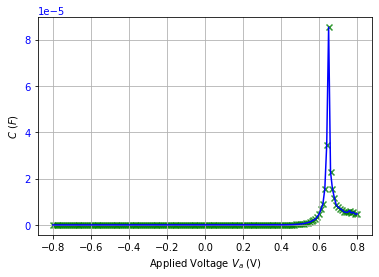

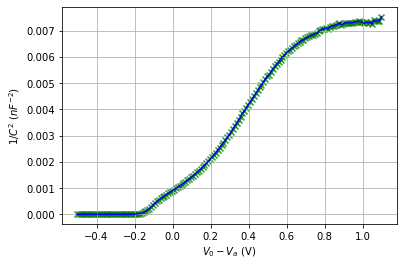

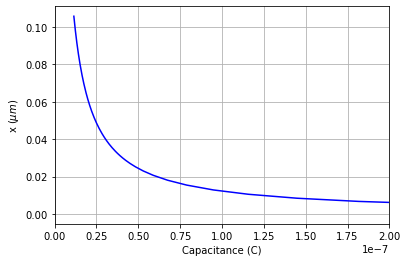

In [5]:
### Plot the Capacitance vs applied Voltage
fig1, ax = plt.subplots()

ax.set_xlabel("Applied Voltage $V_a$ (V)")
ax.set_ylabel("$C$ ($F$)")
ax.plot(voltage, capacitance, color='blue')
ax.scatter(voltage, capacitance, c='green', alpha=0.8, marker='x')
ax.tick_params(axis='y', labelcolor='blue')
#ax.set_ylim(-5, 30)
#ax.set_xlim(-50, 600)
ax.grid()

### Plot inverse capactiance squared in nF vs delta voltage
fig3, ax = plt.subplots()

ax.set_xlabel("$V_0 - V_a$ (V)")
ax.set_ylabel("$1/C^2$ ($nF^{-2}$)")
ax.plot(Vdelta, inverse_cap_squared_nF, color='blue')
ax.scatter(Vdelta, inverse_cap_squared_nF, c='green', alpha=0.8, marker='x')
ax.grid()

### Plot of x vs Capacitance ###
fig4 , ax = plt.subplots()
ax.plot(capacitance ,x_um, color='b')
ax.set_xlabel("Capacitance (C)")
ax.set_ylabel("x ($\mu m$)")
ax.set_xlim(0,2E-7)
ax.grid()

## Plotting

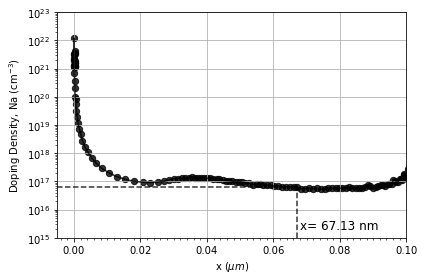

In [6]:
fig, ax1 = plt.subplots()

# Set y axis limits
xlim_min = -0.005
xlim_max = 0.1
ylim_min = 1E15
ylim_max = 1E23

ax1.set_xlabel('x ($\mu m$)')
ax1.set_ylabel('Doping Density, Na (cm$^{-3}$)')
ax1.scatter(x_um, dopant_density, c='k', alpha=0.8, marker='o', label='Doping Density', s=40)
ax1.plot(x_um, dopant_density, c='k', alpha=0.8)

# plot a vertical dashed line at x_um_zero
ax1.vlines(x_um_zero, ylim_min, dopant_density_zero, colors='k', linestyles='--', alpha=0.8)
ax1.hlines(dopant_density_zero, xlim_min, x_um_zero, colors='k', linestyles='--', alpha=0.8)

# Add text with values
ax1.text(x_um_zero + 0.001, ylim_min * 2, "x= {:.2f} nm".format(x_um_zero*1000), fontsize=12)

ax1.set_yscale('log')
ax1.set_ylim(ylim_min, ylim_max)
ax1.set_xlim(xlim_min, xlim_max)
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(0.002))
ax1.grid()

#ax2 = ax1.twinx()
#ax2.scatter(x_um, voltage, c='r', alpha=0.5, marker='x', label='Applied Voltage')
#ax2.tick_params(axis='y', labelcolor='red')
#ax2.set_ylabel('Applied Voltage, $V_a$ (V)')

# combine the legends from both scatter plots
handles1, labels1 = ax1.get_legend_handles_labels()
#handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 
labels = labels1 

#plt.legend(handles, labels)

dep_title = file_name.replace('.txt', ' Dopant Density')
#plt.title(dep_title)
plt.tight_layout()

# Figure save settings
save_dir = os.path.join(folder_path, 'CV plots')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
plt.savefig(os.path.join(save_dir, dep_title + '.png'), dpi=400)

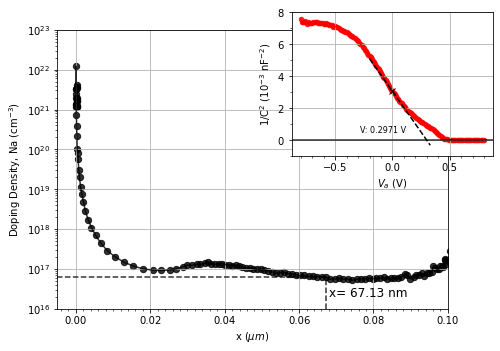

In [7]:
fig, ax1 = plt.subplots(figsize=(7,5))

# Set y axis limits
xlim_min = -0.005
xlim_max = 0.1
ylim_min = 1E16
ylim_max = 1E23

ax1.set_xlabel('x ($\mu m$)')
ax1.set_ylabel('Doping Density, Na (cm$^{-3}$)')
ax1.scatter(x_um, dopant_density, c='k', alpha=0.8, marker='o', label='Doping Density', s=40)
ax1.plot(x_um, dopant_density, c='k', alpha=0.8)

# plot a vertical dashed line at x_um_zero
ax1.vlines(x_um_zero, ylim_min, dopant_density_zero, colors='k', linestyles='--', alpha=0.8)
ax1.hlines(dopant_density_zero, xlim_min, x_um_zero, colors='k', linestyles='--', alpha=0.8)

# Add text with values
ax1.text(x_um_zero + 0.001, ylim_min * 2, "x= {:.2f} nm".format(x_um_zero*1000), fontsize=12)

ax1.set_yscale('log')
ax1.set_ylim(ylim_min, ylim_max)
ax1.set_xlim(xlim_min, xlim_max)
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(0.002))
ax1.grid()

#ax2 = ax1.twinx()
#ax2.scatter(x_um, voltage, c='r', alpha=0.5, marker='x', label='Applied Voltage')
#ax2.tick_params(axis='y', labelcolor='red')
#ax2.set_ylabel('Applied Voltage, $V_a$ (V)')

# combine the legends from both scatter plots
handles1, labels1 = ax1.get_legend_handles_labels()
#handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 
labels = labels1 


# Create a second axes for the additional plot in the top right corner
ax2 = fig.add_axes([0.59, 0.55, 0.4, 0.4])  # Adjust the position and size as needed

# Plot inverse capacitance squared in nF vs. applied voltage on ax2
ax2.set_xlabel("$V_a$ (V)", fontsize=10)
ax2.set_ylabel("1/C$^2$ (10$^{-3}$ nF$^{-2}$)", fontsize=10)
ax2.plot(voltage, inverse_cap_squared_nF, color='r')
ax2.scatter(voltage, inverse_cap_squared_nF, c='r', alpha=0.8, marker='o', s=20)
ax2.axhline(0, c='k',  alpha=0.8)
ax2.set_ylim(-1E-3,8E-3)
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.001))
ax2.grid()

# Set y-axis tick formatter for the top axis
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-3, 3))
ax2.yaxis.set_major_formatter(formatter)
ax2.yaxis.offsetText.set_visible(False)

# Calculate V0
v1 = -0.2  # lower bound
v2 = 0.2  # upper bound
C_grad2 = np.gradient(C_grad, voltage)
v_range_indices = np.where((voltage >= v1) & (voltage <= v2))
inflection_index = v_range_indices[0][np.argmax(C_grad2[v_range_indices])]

ax2.plot(voltage[inflection_index], inverse_cap_squared_nF[inflection_index], 'kx')

# Plot the tangent line
x1 = voltage[inflection_index] - 0.2
x2 = voltage[inflection_index] + 0.33
x_vals = np.linspace(x1, x2, num=100)
y_vals = C_grad[inflection_index] * x_vals + inverse_cap_squared_nF[inflection_index]
ax2.plot(x_vals, y_vals, 'k--')

V0 = -inverse_cap_squared_nF[inflection_index] / C_grad[inflection_index]
ax2.text(0.57, 0.15, "V: {:.4f} V".format(V0),
         transform=ax2.transAxes, fontsize=8, ha='right', va='bottom')

plt.subplots_adjust(top=0.9, right=0.9)  # Adjust the top and right margins as needed

# Save the figure
plt.savefig(os.path.join(save_dir, CV_title + '_with_inverted_C.png'), dpi=300)